# Venta de Casas en Peru 

## 1. Extrayendo informacion 
- Para este proyecto se extraera toda la informacion(precios,lugar,tamaño,enlace,baño,dormitorios,etc) acerca de las casas en venta de la pagina properati en donde se pondra enfasis al departamento de Lima con el fin de que un usario pueda adquirir la casa mas conveniente, tambien se tendra en cuenta el valor del dolar y su flucacion pero ello ya queda para despues.

- Se hara uso del metodo **web scraping**.
Obs: 
    - Se planeo usar Urbania pero esta restrinfica para el webscraping(codigo 403)
    
- Enlace de la pagina: [Properati](https://www.properati.com.pe/s/casa/venta)


### Tutorial
1. Lo primero que necesitaremos sera el enlace la pagina que queremos webcrapear [Properati](https://www.properati.com.pe/s/casa/venta), puede ser cualquier otra.
2. Prepararemos las librerias que utlizaremos, en caso de no tener instalarlas usado pip por ejemplo

In [ ]:
#!pip install requests beautifulsoup4

#### Librerias 

- `requests`: Esta biblioteca permite realizar solicitudes HTTP y obtener el contenido de una página web. Se utiliza para enviar solicitudes a un servidor y recibir la respuesta correspondiente. En el contexto del web scraping, se utiliza para obtener el HTML de una página web y luego analizarlo con BeautifulSoup.

- `BeautifulSoup`: Es una biblioteca de Python utilizada para analizar y extraer datos de documentos HTML y XML. Proporciona herramientas para buscar, navegar y manipular la estructura del documento. En el contexto del web scraping, BeautifulSoup se utiliza para extraer información específica de las páginas web.

- `pandas`: Es una biblioteca de Python que proporciona estructuras de datos y herramientas para el análisis y manipulación de datos. Ofrece una estructura de datos llamada DataFrame, que es útil para organizar y trabajar con datos tabulares. En el contexto del web scraping, pandas se utiliza para almacenar los datos extraídos en un formato tabular y realizar operaciones y análisis posteriores.

**Codigo:**

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

3. Comprobar que la pagina web es apta para el webscrapeo. Aqui una guia : 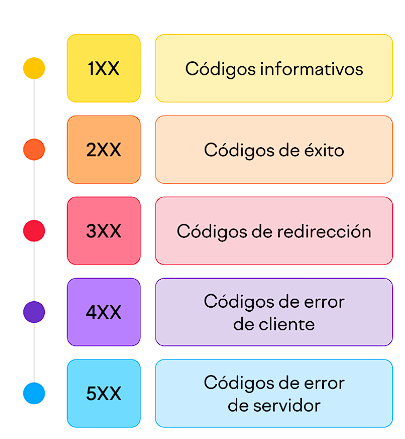

In [5]:
url = 'https://www.properati.com.pe/s/casa/venta' # enlace de la pagina a webscrapear
response = requests.get(url) # recibe la respuesta del server de la pagina
html_content = response.content # devuelve el contenido de la pagina en formato byter
response.status_code # con esto comprobamos (codigo)

200